### Importing the datasets and required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

In [2]:
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE

In [3]:
import lime
import lime.lime_tabular
import shap

In [4]:
from feature_engine.outliers import Winsorizer

In [5]:
!jupyter nbextension enable --py luxwidget

Enabling notebook extension luxwidget/extension...
      - Validating: ok


In [6]:
import lux

In [7]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [8]:
from sklearn.tree import export_graphviz
from subprocess import call

In [9]:
import statsmodels.api as sm

In [10]:
data_quarter=pd.read_excel(r"D:\Elahe\MSF\Thesis\Datasets\Quarter.xlsx")
data_yearly=pd.read_excel(r"D:\Elahe\MSF\Thesis\Datasets\Year.xlsx")

### Creating two datasets for first and second layer of optimazation

In [11]:
def Remove_Character (dataset, list_name, Character):
    removal_rows=[]
    for i in range (len(list_name)):
        if list_name[i]==Character:
            removal_rows.append(i)
    dataset=dataset.drop(removal_rows)
    dataset=dataset.reset_index()
    return dataset

In [12]:
ALL_data_quarter=Remove_Character(data_quarter, data_quarter["Lag Dummy Y Combine"], " ")
ALL_data_yearly=Remove_Character(data_yearly, data_yearly["Lag Dummy Y Combine"], " ")

In [13]:
ALL_data_quarter["Lag Dummy Y Combine"]=pd.to_numeric(ALL_data_quarter["Lag Dummy Y Combine"], downcast='integer')
ALL_data_yearly["Lag Dummy Y Combine"]=pd.to_numeric(ALL_data_yearly["Lag Dummy Y Combine"], downcast='integer')

### Checking Multicolinearity

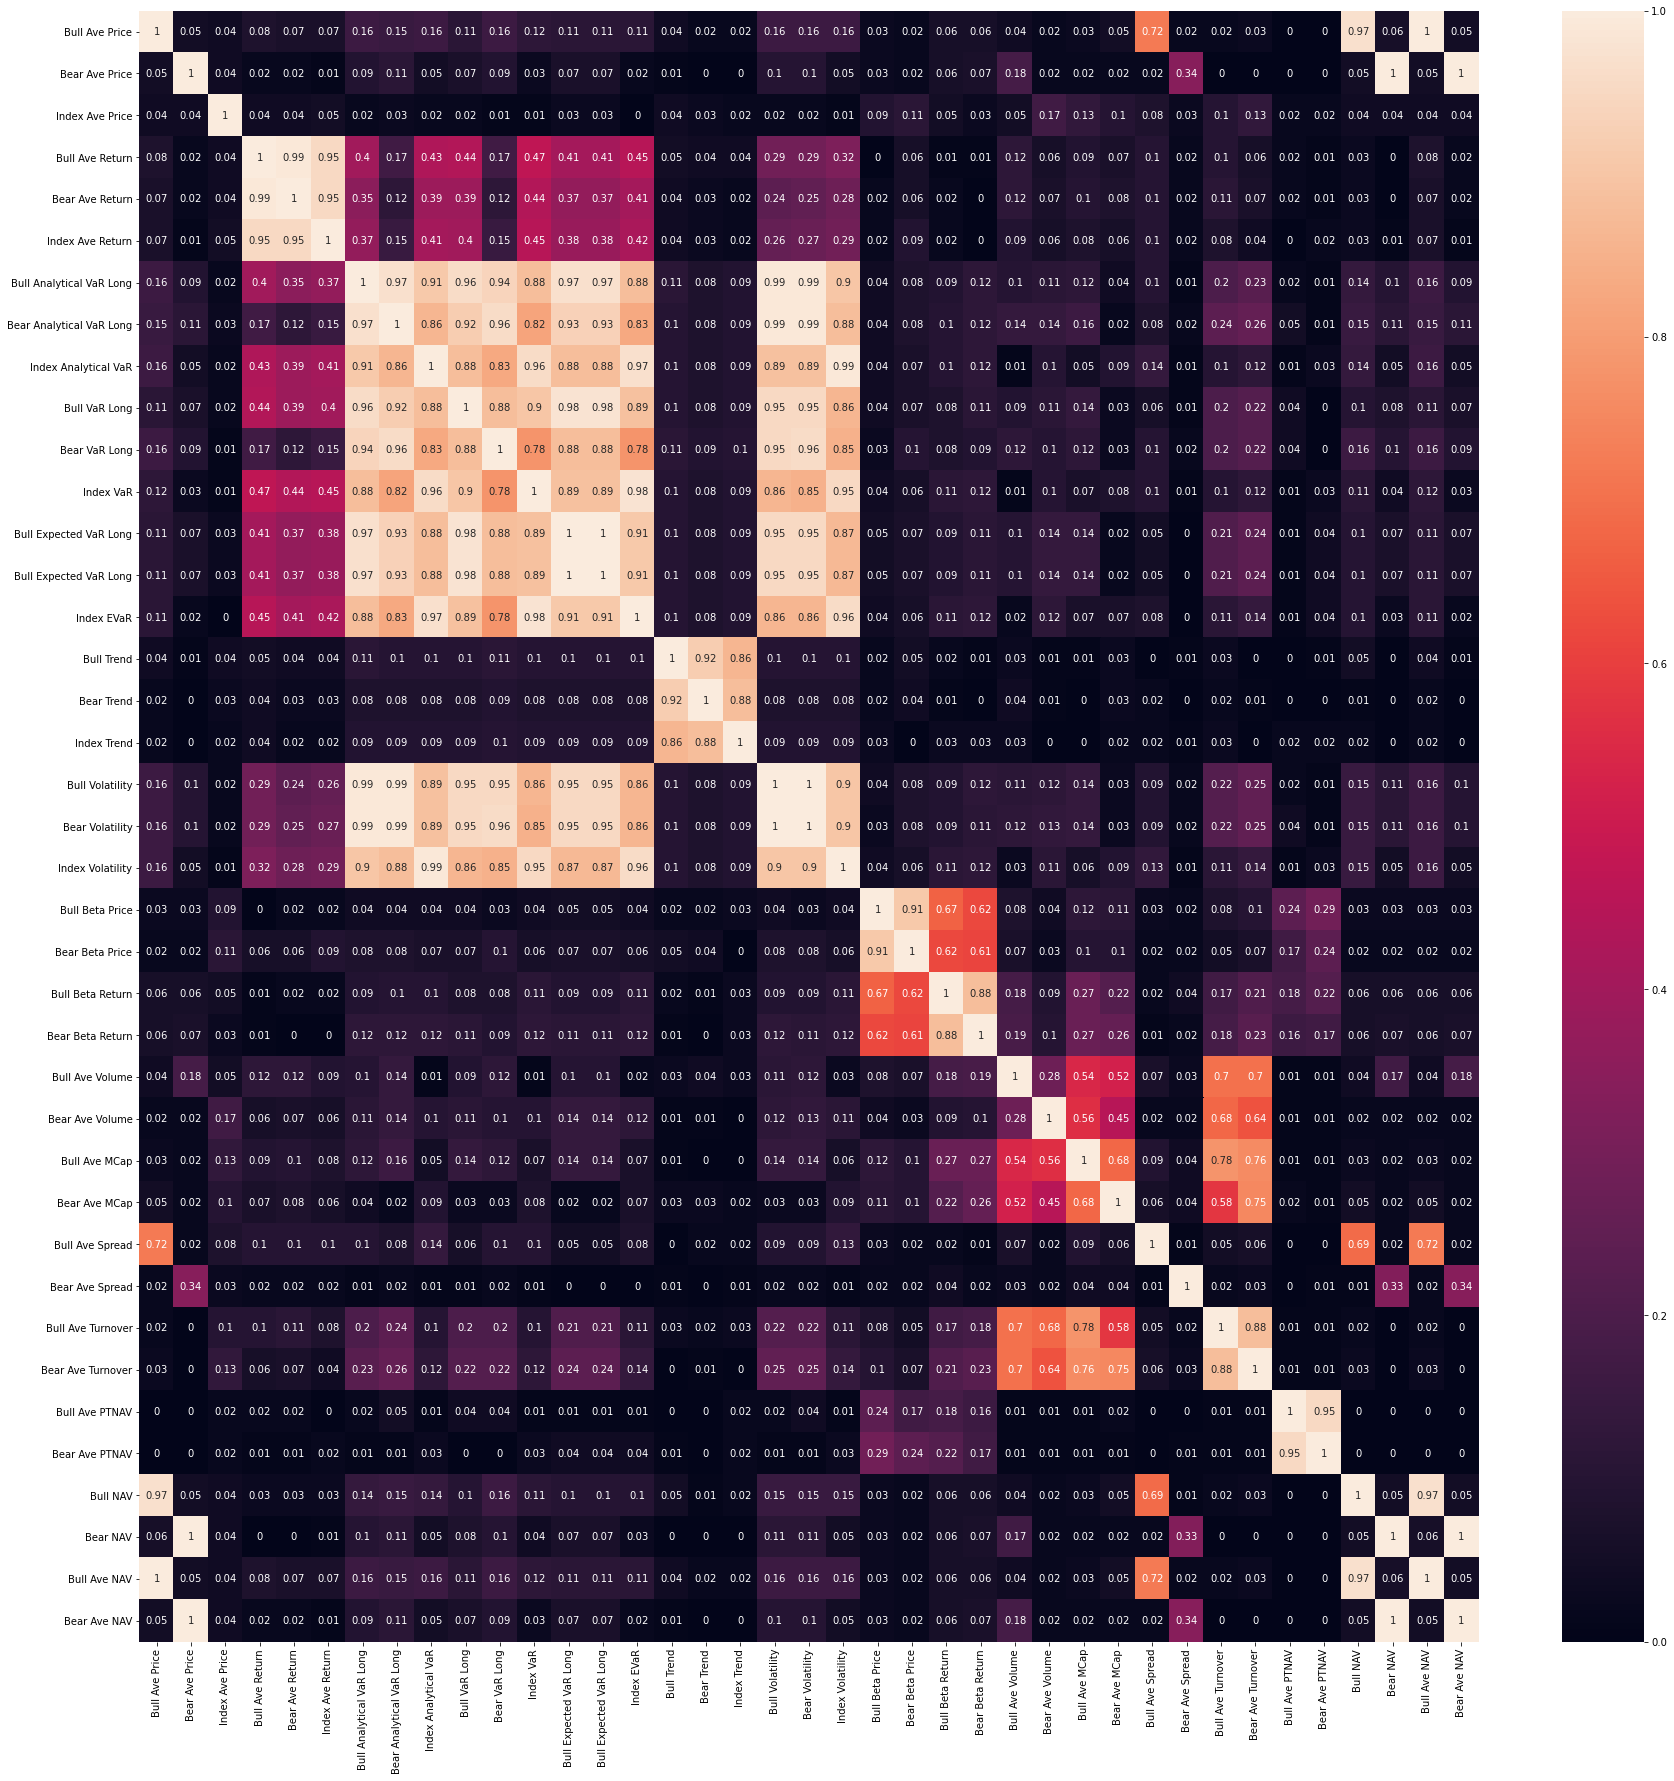

In [14]:
plt.subplots(figsize=(30,30))
ax = sns.heatmap(data=abs(ALL_data_quarter[["Bull Ave Price","Bear Ave Price","Index Ave Price","Bull Ave Return","Bear Ave Return"
                  ,"Index Ave Return", "Bull Analytical VaR Long","Bear Analytical VaR Long", "Index Analytical VaR",
                  "Bull VaR Long","Bear VaR Long","Index VaR","Bull Expected VaR Long","Bull Expected VaR Long",
                  "Index EVaR","Bull Trend", "Bear Trend", "Index Trend", "Bull Volatility", "Bear Volatility", 
                  "Index Volatility","Bull Beta Price","Bear Beta Price", "Bull Beta Return", "Bear Beta Return", 
                  "Bull Ave Volume","Bear Ave Volume", "Bull Ave MCap", "Bear Ave MCap","Bull Ave Spread", 
                  "Bear Ave Spread", "Bull Ave Turnover", "Bear Ave Turnover","Bull Ave PTNAV","Bear Ave PTNAV",
                  "Bull NAV","Bear NAV","Bull Ave NAV", "Bear Ave NAV"]].corr().round(2)), annot=True)
plt.show()

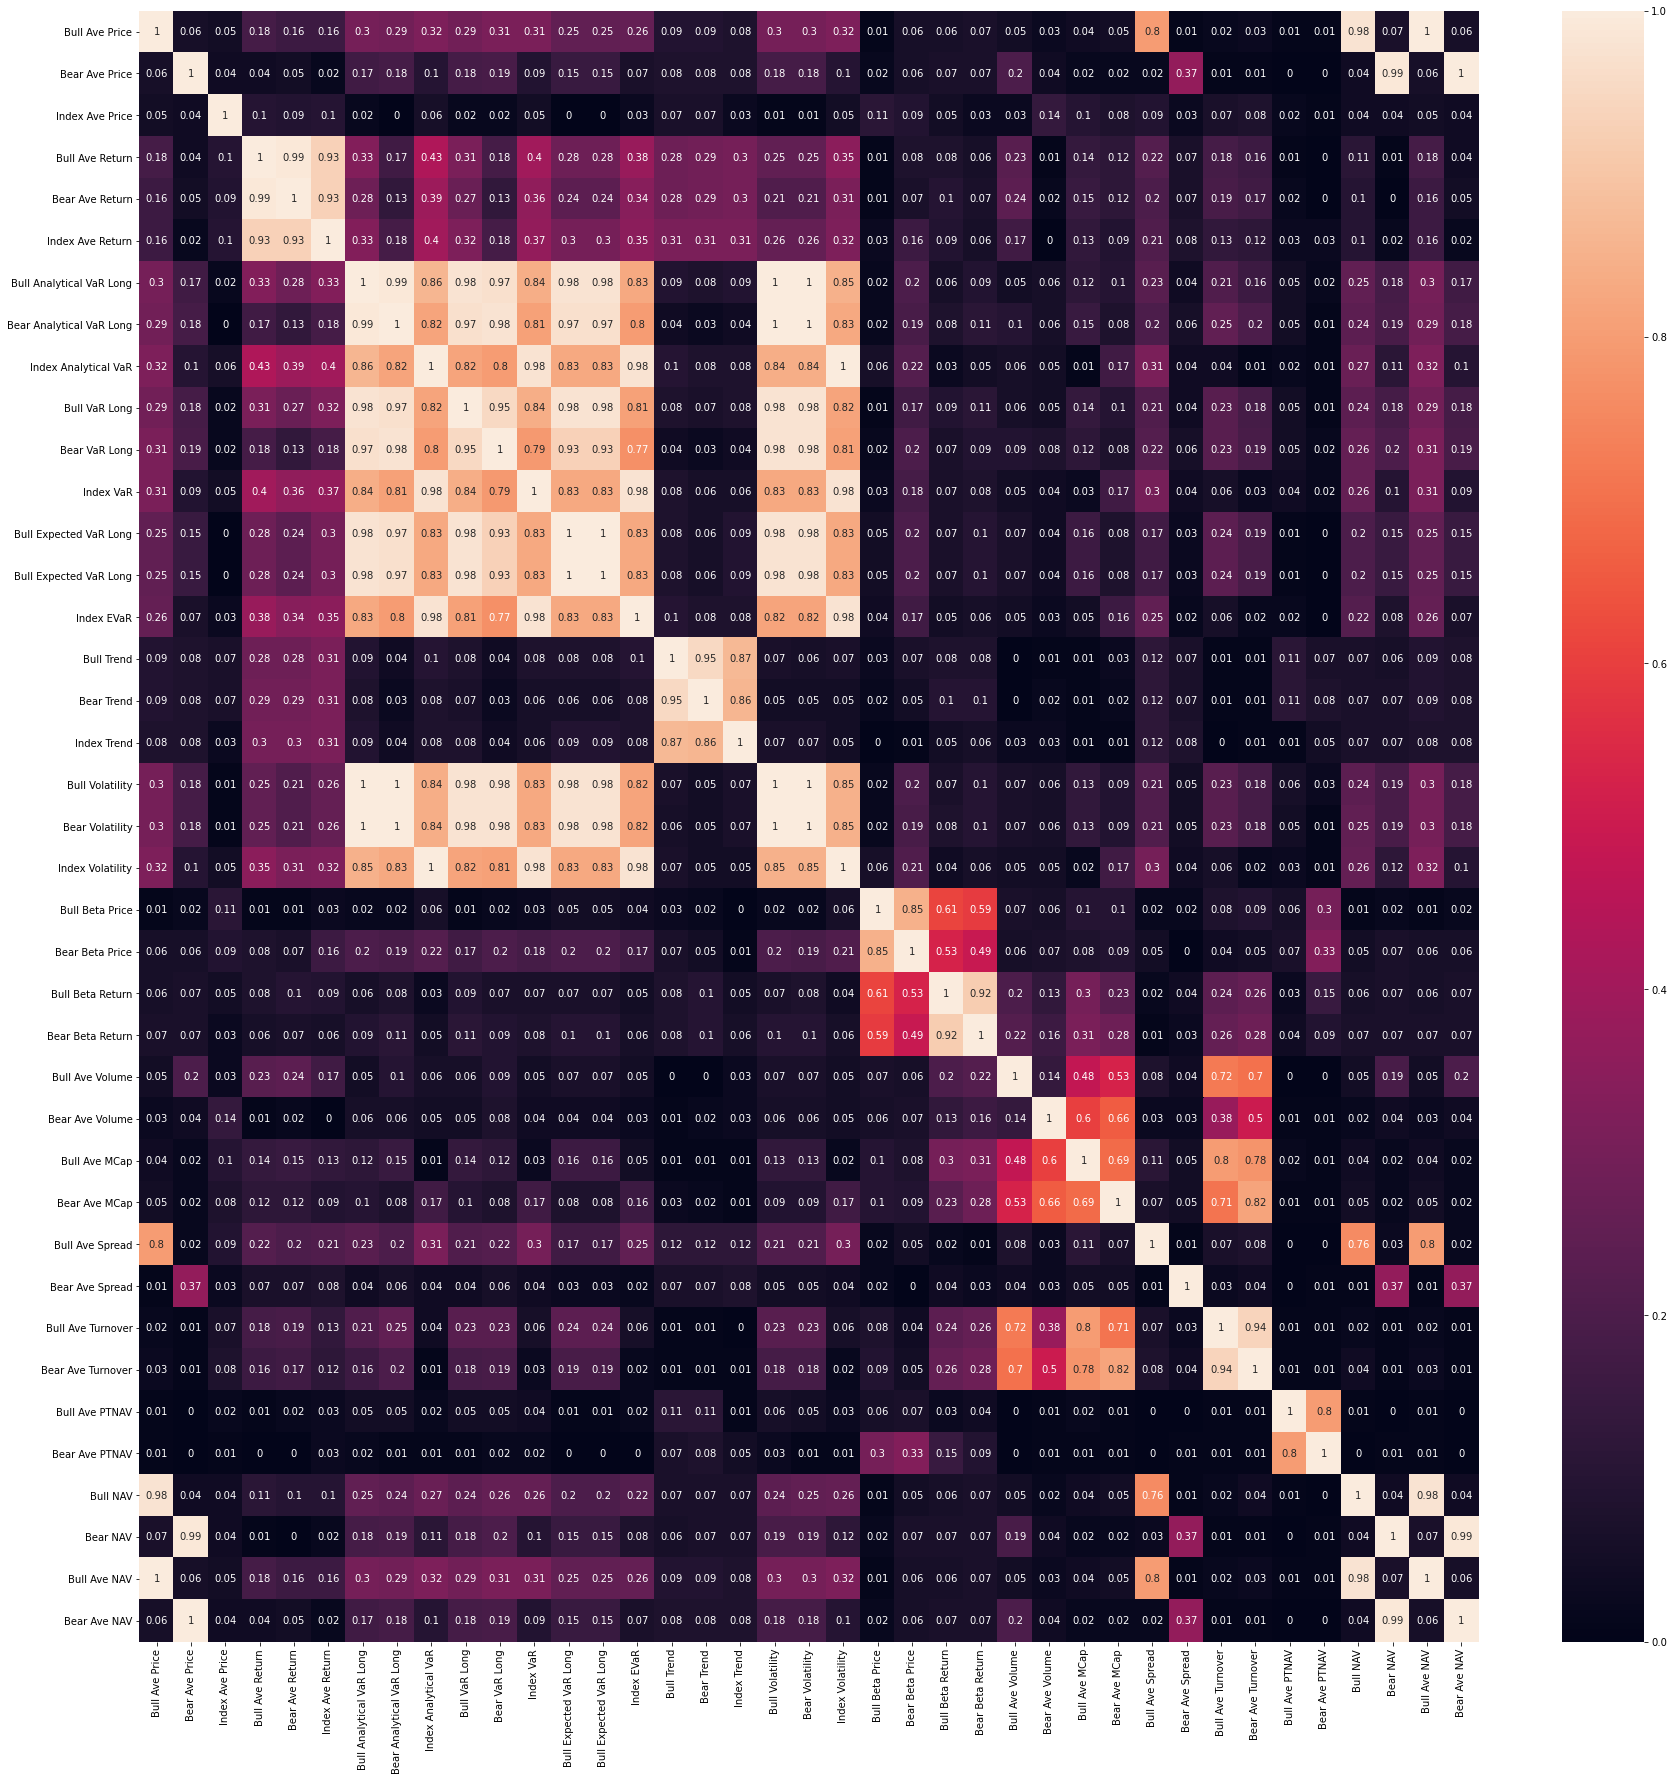

In [15]:
plt.subplots(figsize=(30,30))
ax = sns.heatmap(data=abs(ALL_data_yearly[["Bull Ave Price","Bear Ave Price","Index Ave Price","Bull Ave Return","Bear Ave Return"
                  ,"Index Ave Return", "Bull Analytical VaR Long","Bear Analytical VaR Long", "Index Analytical VaR",
                  "Bull VaR Long","Bear VaR Long","Index VaR","Bull Expected VaR Long","Bull Expected VaR Long",
                  "Index EVaR","Bull Trend", "Bear Trend", "Index Trend", "Bull Volatility", "Bear Volatility", 
                  "Index Volatility","Bull Beta Price","Bear Beta Price", "Bull Beta Return", "Bear Beta Return", 
                  "Bull Ave Volume","Bear Ave Volume", "Bull Ave MCap", "Bear Ave MCap","Bull Ave Spread", 
                  "Bear Ave Spread", "Bull Ave Turnover", "Bear Ave Turnover","Bull Ave PTNAV","Bear Ave PTNAV",
                  "Bull NAV","Bear NAV","Bull Ave NAV", "Bear Ave NAV"]].corr().round(2)), annot=True)
plt.show()

In [16]:
ALL_data_yearly[["Bull Ave Price","Bear Ave Price","Index Ave Price","Bull Ave Return","Bear Ave Return"
                  ,"Index Ave Return", "Bull Analytical VaR Long","Bear Analytical VaR Long", "Index Analytical VaR",
                  "Bull VaR Long","Bear VaR Long","Index VaR","Bull Expected VaR Long","Bull Expected VaR Long",
                  "Index EVaR","Bull Trend", "Bear Trend", "Index Trend", "Bull Volatility", "Bear Volatility", 
                  "Index Volatility","Bull Beta Price","Bear Beta Price", "Bull Beta Return", "Bear Beta Return", 
                  "Bull Ave Volume","Bear Ave Volume", "Bull Ave MCap", "Bear Ave MCap","Bull Ave Spread", 
                  "Bear Ave Spread", "Bull Ave Turnover", "Bear Ave Turnover","Bull Ave PTNAV","Bear Ave PTNAV",
                  "Bull NAV","Bear NAV","Bull Ave NAV", "Bear Ave NAV"]].corr().round(2)

d:\ProgramData\Anaconda3\lib\site-packages\IPython\core\formatters.py:918: UserWarning:
Unexpected error in rendering Lux widget and recommendations. Falling back to Pandas display.
Please report the following issue on Github: https://github.com/lux-org/lux/issues 

C:\Users\enikb\AppData\Roaming\Python\Python38\site-packages\lux\core\frame.py:609: UserWarning:Traceback (most recent call last):
  File "C:\Users\enikb\AppData\Roaming\Python\Python38\site-packages\lux\core\frame.py", line 558, in _ipython_display_
    self.maintain_metadata()
  File "C:\Users\enikb\AppData\Roaming\Python\Python38\site-packages\lux\core\frame.py", line 134, in maintain_metadata
    lux.config.executor.compute_stats(self)
  File "C:\Users\enikb\AppData\Roaming\Python\Python38\site-packages\lux\executor\PandasExecutor.py", line 541, in compute_stats
    ldf.unique_values[attribute_repr] = list(ldf[attribute].unique())
  File "C:\Users\enikb\AppData\Roaming\Python\Python38\site-packages\lux\core\frame.py", l

,Bull Ave Price,Bear Ave Price,Index Ave Price,Bull Ave Return,Bear Ave Return,Index Ave Return,Bull Analytical VaR Long,Bear Analytical VaR Long,Index Analytical VaR,Bull VaR Long,...,Bull Ave Spread,Bear Ave Spread,Bull Ave Turnover,Bear Ave Turnover,Bull Ave PTNAV,Bear Ave PTNAV,Bull NAV,Bear NAV,Bull Ave NAV,Bear Ave NAV
Bull Ave Price,1.00,0.06,-0.05,-0.18,0.16,-0.16,-0.30,-0.29,-0.32,-0.29,...,0.80,0.01,-0.02,-0.03,0.01,-0.01,0.98,0.07,1.00,0.06
Bear Ave Price,0.06,1.00,-0.04,0.04,-0.05,0.02,-0.17,-0.18,-0.10,-0.18,...,0.02,0.37,0.01,0.01,0.00,-0.00,0.04,0.99,0.06,1.00
Index Ave Price,-0.05,-0.04,1.00,0.10,-0.09,0.10,0.02,0.00,0.06,0.02,...,-0.09,-0.03,0.07,0.08,0.02,0.01,-0.04,-0.04,-0.05,-0.04
Bull Ave Return,-0.18,0.04,0.10,1.00,-0.99,0.93,0.33,0.17,0.43,0.31,...,-0.22,0.07,0.18,0.16,0.01,-0.00,-0.11,-0.01,-0.18,0.04
Bear Ave Return,0.16,-0.05,-0.09,-0.99,1.00,-0.93,-0.28,-0.13,-0.39,-0.27,...,0.20,-0.07,-0.19,-0.17,-0.02,-0.00,0.10,-0.00,0.16,-0.05
Index Ave Return,-0.16,0.02,0.10,0.93,-0.93,1.00,0.33,0.18,0.40,0.32,...,-0.21,0.08,0.13,0.12,0.03,0.03,-0.10,-0.02,-0.16,0.02
Bull Analytical VaR Long,-0.30,-0.17,0.02,0.33,-0.28,0.33,1.00,0.99,0.86,0.98,...,-0.23,-0.04,-0.21,-0.16,-0.05,0.02,-0.25,-0.18,-0.30,-0.17
Bear Analytical VaR Long,-0.29,-0.18,0.00,0.17,-0.13,0.18,0.99,1.00,0.82,0.97,...,-0.20,-0.06,-0.25,-0.20,-0.05,0.01,-0.24,-0.19,-0.29,-0.18
Index Analytical VaR,-0.32,-0.10,0.06,0.43,-0.39,0.40,0.86,0.82,1.00,0.82,...,-0.31,-0.04,-0.04,-0.01,-0.02,0.01,-0.27,-0.11,-0.32,-0.10
Bull VaR Long,-0.29,-0.18,0.02,0.31,-0.27,0.32,0.98,0.97,0.82,1.00,...,-0.21,-0.04,-0.23,-0.18,-0.05,0.01,-0.24,-0.18,-0.29,-0.18


In [17]:
def getCorrelatedFeature(corrdata, th):
    selected_features = []
    value = []
    
    for i, col in enumerate(corrdata.index):
        if abs(corrdata[col])>th:
            selected_features.append(col)
            value.append(corrdata[col])
            
    df = pd.DataFrame(data=value, index=selected_features, columns = ['Corr Value'])
    
    return df

In [17]:
corrmat = FSL_data_quarter.corr()

NameError: name 'FSL_data_quarter' is not defined

In [18]:
getCorrelatedFeature(corrmat['Bull Ave MCap'], 0.5)

NameError: name 'corrmat' is not defined

### Preparing the features for optimazation

In [23]:
ALL_X_Quarter=ALL_data_quarter[["Bull Ave NAV", "Bear Ave NAV","Index Ave Price","Index Ave Return",
                                "Index Trend", "Index Volatility","Bear Beta Price", "Bear Beta Return", 
                                "Bull Ave Volume","Bear Ave Volume", "Bull Ave MCap","Bear Ave MCap","Bull Ave Spread",
                                "Bear Ave Spread", "Bear Ave Turnover","Bear Ave PTNAV","Q1","Q2","Q3",
                                "Y2013","Y2014","Y2015","Y2016","Y2017","Y2018","Y2019","Y2020","Foreign Equity",
                                "Equity","Commodity","Currency"]]

ALL_Y_Quarter=ALL_data_quarter["Lag Dummy Y Combine"]

ALL_X_Year=ALL_data_yearly[["Bull Ave NAV", "Bear Ave NAV","Index Ave Price","Index Ave Return",
                            "Index Trend", "Index Volatility","Bear Beta Price", "Bear Beta Return", 
                            "Bull Ave Volume","Bear Ave Volume", "Bear Ave MCap","Bull Ave Spread", 
                            "Bear Ave Spread", "Bear Ave Turnover","Bear Ave PTNAV", "Y2013","Y2014",
                            "Y2015","Y2016","Y2017","Y2018","Y2019","Y2020","Foreign Equity","Equity","Commodity",
                            "Currency"]]

ALL_Y_Year=ALL_data_yearly["Lag Dummy Y Combine"]

In [24]:
ALL_X_Quarter.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

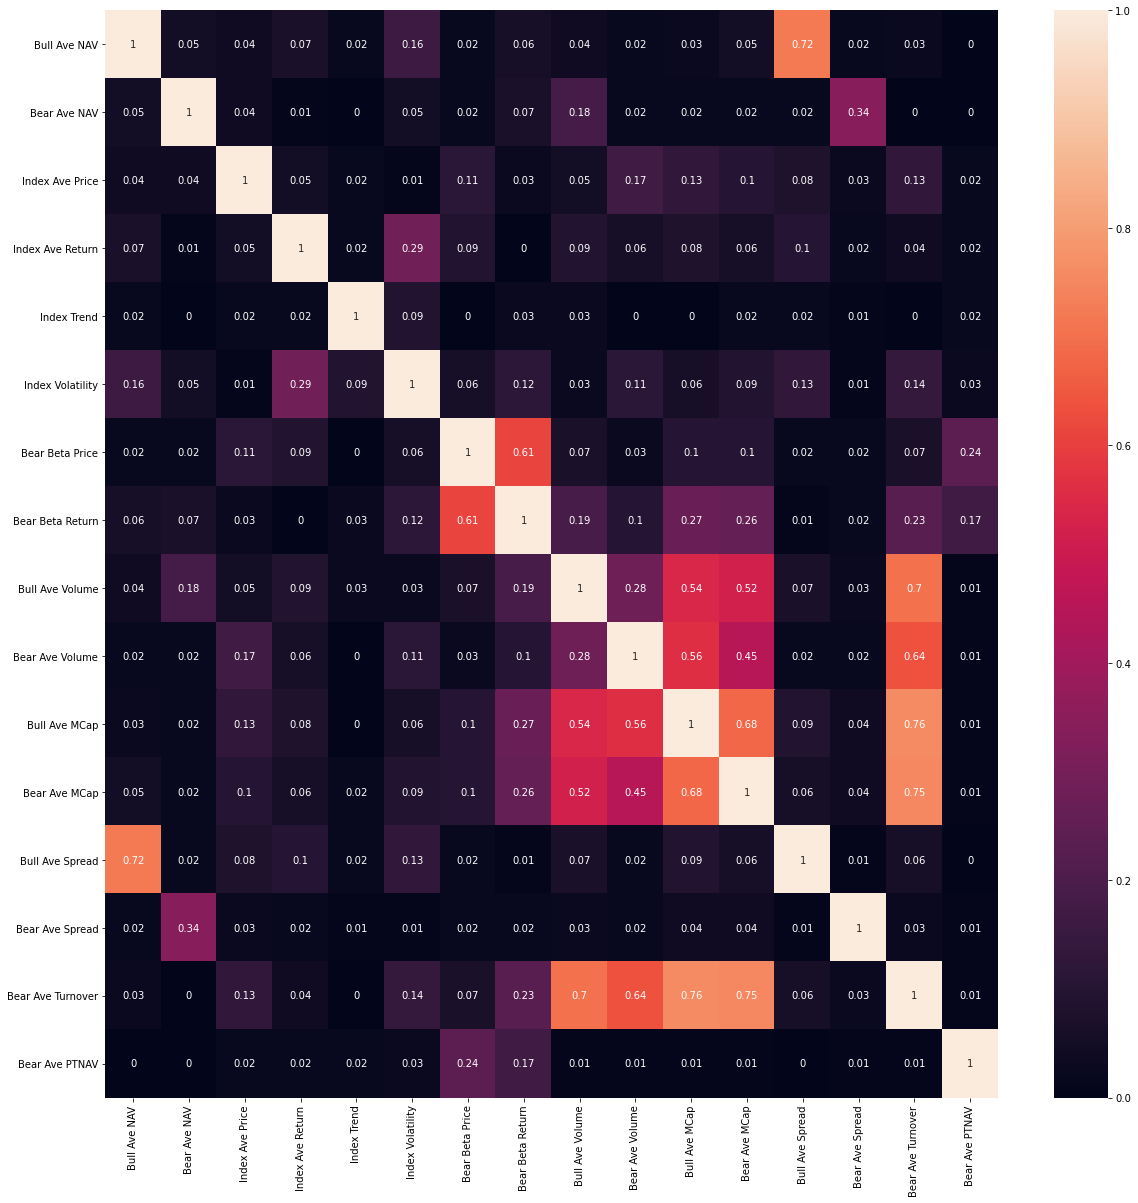

In [25]:
plt.subplots(figsize=(20,20))
ax = sns.heatmap(data=abs(ALL_X_Quarter[["Bull Ave NAV", "Bear Ave NAV","Index Ave Price","Index Ave Return",
                                "Index Trend", "Index Volatility","Bear Beta Price", "Bear Beta Return", 
                                "Bull Ave Volume","Bear Ave Volume", "Bull Ave MCap","Bear Ave MCap","Bull Ave Spread",
                                "Bear Ave Spread", "Bear Ave Turnover","Bear Ave PTNAV"]].corr().round(2)), annot=True)
plt.show()

In [26]:
ALL_X_Year.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

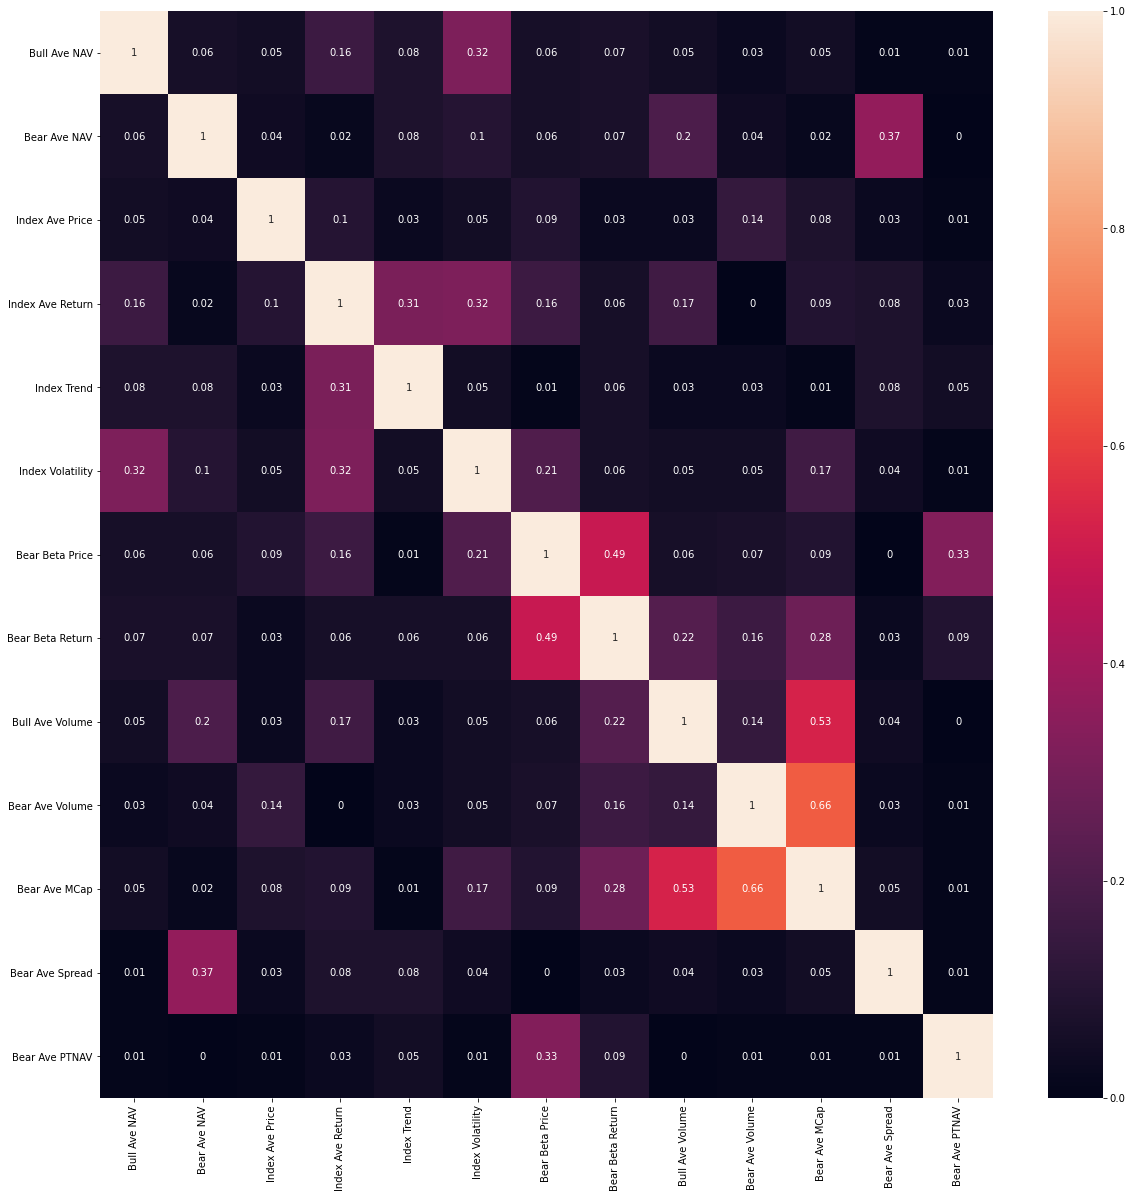

In [27]:
plt.subplots(figsize=(20,20))
ax = sns.heatmap(data=abs(ALL_X_Year[["Bull Ave NAV", "Bear Ave NAV","Index Ave Price","Index Ave Return",
                                "Index Trend", "Index Volatility","Bear Beta Price", "Bear Beta Return", 
                                "Bull Ave Volume","Bear Ave Volume", "Bear Ave MCap", "Bear Ave Spread", 
                                "Bear Ave PTNAV"]].corr().round(2)), annot=True)
plt.show()

### Creating the train and test samples

In [28]:
ALL_X_Quarter_Train, ALL_X_Quarter_Test, ALL_Y_Quarter_Train, ALL_Y_Quarter_Test = train_test_split (ALL_X_Quarter, 
                                                                                                     ALL_Y_Quarter, 
                                                                                                     test_size=0.3, 
                                                                                                     random_state=0)

In [29]:
ALL_X_Year_Train, ALL_X_Year_Test, ALL_Y_Year_Train, ALL_Y_Year_Test = train_test_split (ALL_X_Year, ALL_Y_Year, 
                                                                                         test_size=0.3, random_state=0)

In [30]:
len(ALL_Y_Quarter_Test)

457

### Main function

In [31]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Random Forest Accuracy: ', accuracy_score(y_test, y_pred))

In [107]:
def Main_function (X_Train, Y_Train, X_Test, Y_Test, Outliers_Featurs, Outliers=True, Transformation=True, Scaling=True, 
                   Extra=None):
    
    
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
    model.fit(X_Train, Y_Train)
    print ("Raw data without preprocessing")
    print ("Logistic Accuracy: " + str(model.score(X_Test, Y_Test)))
    run_randomForest(X_Train, X_Test, Y_Train, Y_Test)
    print ("The raw model coefficients are " + str(model.coef_))
    print ("")
    print ("")
    
    if Extra != None:
        X_Train_Extra=X_Train[Extra].reset_index()
        X_Train=X_Train.drop(Extra, axis=1)
        X_Test_Extra=X_Test[Extra].reset_index()
        X_Test=X_Test.drop(Extra, axis=1)
        
    
    header = np.array(list(X_Train.columns))
    
    if Outliers==True:
        winsorizer = Winsorizer(capping_method ='gaussian', tail='both', fold=1.5, variables=Outliers_Featurs)
        X_Train = winsorizer.fit_transform(X_Train)
        X_Test = winsorizer.transform(X_Test)
    
    
    if Transformation==True:
        transformer = PowerTransformer(method='yeo-johnson', standardize=True)
        X_Train = transformer.fit_transform(X_Train)
        X_Test = transformer.transform(X_Test)
    
    
    if Scaling==True:
        scaler = StandardScaler()
        X_Train = scaler.fit_transform(X_Train)
        X_Test = scaler.transform(X_Test)
    
    
    if Transformation==True or Scaling==True:
        X_Train = pd.DataFrame(X_Train, columns = header)
        X_Test = pd.DataFrame(X_Test, columns = header)
    
    if Extra != None:
        X_Train=X_Train.join(X_Train_Extra)
        X_Test=X_Test.join(X_Test_Extra)
        X_Train=X_Train.drop(["index"], axis=1)
        X_Test=X_Test.drop(["index"], axis=1)
        
    
    model.fit(X_Train, Y_Train)
    print ("Raw data preprocessing")
    print ("Logistic Accuracy: " + str(model.score(X_Test, Y_Test)))
    run_randomForest(X_Train, X_Test, Y_Train, Y_Test)
    print ("The preprocessing model coefficients are " + str(model.coef_))
    print ("")
    print ("")
    
    
    selector = RFE(model, n_features_to_select=12, step=1)
    selector.fit(X_Train, Y_Train)
    RFE_selected_features = list(X_Train.columns[selector.support_])
    model.fit(X_Train[RFE_selected_features], Y_Train)
    print ("RFE model")
    print ("Logistic Accuracy: " + str(model.score(X_Test[RFE_selected_features], Y_Test)))
    run_randomForest(X_Train[RFE_selected_features], X_Test[RFE_selected_features], Y_Train, Y_Test)
    print ("The selected variables are " + str(RFE_selected_features))
    print ("The variables rankings are " + str(selector.ranking_))
    print ("")
    print ("")
    
    
    selector = EFS(model,max_features=6,print_progress=False)
    selector.fit(X_Train, Y_Train)
    EFS_selected_features = list(selector.best_feature_names_)
    model.fit(X_Train[EFS_selected_features], Y_Train)
    print ("EFS model")
    print ("Logistic Accuracy: " + str(model.score(X_Test[EFS_selected_features], Y_Test)))
    run_randomForest(X_Train[EFS_selected_features], X_Test[EFS_selected_features], Y_Train, Y_Test)
    print ("The EFS selected variables are " + str(EFS_selected_features))
    print ("")
    print ("")
    
    
    selector = SelectFromModel(estimator=LogisticRegression(penalty = 'l1', C = 0.08, solver = 'liblinear'), #best 0.02 for quarter and 0.2 for year
                      max_features=None, norm_order=1, prefit=False, threshold=None)
    selector.fit(X_Train, Y_Train)
    L1_selected_features = X_Train.columns[selector.get_support()]
    model.fit(X_Train[L1_selected_features], Y_Train)
    print ("L1 model")
    print ("Logistic Accuracy: " + str(model.score(X_Test[L1_selected_features], Y_Test)))
    run_randomForest(X_Train[L1_selected_features], X_Test[L1_selected_features], Y_Train, Y_Test)
    print ("The selected variables are " + str(L1_selected_features))  

    
    selector = SelectFromModel(estimator=LogisticRegression(penalty = 'l2', C = 0.05, solver = 'liblinear'), #best 0.02 for year
                      max_features=None, norm_order=1, prefit=False, threshold=None)
    selector.fit(X_Train, Y_Train)
    L2_selected_features = X_Train.columns[selector.get_support()]
    model.fit(X_Train[L2_selected_features], Y_Train)
    print ("L2 model")
    print ("Logistic Accuracy: " + str(model.score(X_Test[L2_selected_features], Y_Test)))
    run_randomForest(X_Train[L2_selected_features], X_Test[L2_selected_features], Y_Train, Y_Test)
    print ("The selected variables are " + str(L2_selected_features))       
    print ("coefficients are " + str(selector.estimator_.coef_))
    print ("")
    print ("")
    
    
    selector = SelectFromModel(estimator=LogisticRegression(penalty = 'elasticnet', C = 0.2, solver = 'saga', l1_ratio=0.5), #best 0.02
                      max_features=None, norm_order=1, prefit=False, threshold=None)
    selector.fit(X_Train, Y_Train)
    EN_selected_features = X_Train.columns[selector.get_support()]
    model.fit(X_Train[EN_selected_features], Y_Train)
    print ("Elastic Net model")
    print ("Logistic Accuracy: " + str(model.score(X_Test[EN_selected_features], Y_Test)))
    run_randomForest(X_Train[EN_selected_features], X_Test[EN_selected_features], Y_Train, Y_Test)
    print ("The selected variables are " + str(EN_selected_features))       
    print ("coefficients are " + str(selector.estimator_.coef_))
    print ("")
    print ("")

In [70]:
def Estimating_function (X_Train, Y_Train, X_Test, Y_Test, Outliers_Featurs, Outliers=True, Transformation=True, Scaling=True):
    
    
    header = np.array(list(X_Train.columns))
    
    if Outliers==True:
        winsorizer = Winsorizer(capping_method ='gaussian', tail='both', fold=1.5, variables=Outliers_Featurs)
        X_Train = winsorizer.fit_transform(X_Train)
        X_Test = winsorizer.transform(X_Test)
    
    
    if Transformation==True:
        transformer = PowerTransformer(method='yeo-johnson', standardize=True)
        X_Train = transformer.fit_transform(X_Train)
        X_Test = transformer.transform(X_Test)
    
    
    if Scaling==True:
        scaler = StandardScaler()
        X_Train = scaler.fit_transform(X_Train)
        X_Test = scaler.transform(X_Test)
    
    
    if Transformation==True or Scaling==True:
        X_Train = pd.DataFrame(X_Train, columns = header)
        X_Test = pd.DataFrame(X_Test, columns = header)
    
        
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
    model.fit(X_Train, Y_Train)
    print ("Raw data preprocessing")
    print ("Logistic Accuracy: " + str(model.score(X_Test, Y_Test)))
    run_randomForest(X_Train, X_Test, Y_Train, Y_Test)
    print ("The preprocessing model coefficients are " + str(model.coef_))
    print ("The preprocessing model coefficients are " + str(model.intercept_))
    print ("")
    print ("")
    
    Y_Train = Y_Train.reset_index(drop=True)
    
    np.exp(model.coef_)
    logit_model=sm.MNLogit(Y_Train,sm.add_constant(X_Train))
    logit_model
    result=logit_model.fit()
    stats1=result.summary()
    stats2=result.summary2()
    print(stats1)
    print(stats2)

In [ ]:
var1=['Bull Ave NAV', 'Index Ave Price', 'Index Ave Return', 'Index Trend',
       'Index Volatility', 'Bear Beta Return', 'Bear Ave Volume',
        'Bull Ave Spread', 'Bear Ave PTNAV']

In [ ]:
ALL_Y_Quarter_Train.isnull().sum()

In [103]:
Main_function(ALL_X_Quarter_Train, ALL_Y_Quarter_Train, ALL_X_Quarter_Test, 
              ALL_Y_Quarter_Test, var1, Outliers=True, Transformation=True, Scaling=True, 
              Extra=["Q1","Q2","Q3","Y2013","Y2014","Y2015","Y2016","Y2017","Y2018",
                     "Y2019","Y2020","Foreign Equity","Equity","Commodity","Currency"])

NameError: name 'var1' is not defined

In [72]:
features = ['Bull Ave NAV', 'Index Volatility', 'Bear Beta Return', 'Index Ave Price',"Y2013","Y2014","Y2015","Y2016",
            "Y2017","Y2018","Y2019","Y2020","Foreign Equity","Equity","Commodity", "Currency"]
var4 = ['Bull Ave NAV', 'Index Volatility', 'Bear Beta Return']

In [73]:
Estimating_function(ALL_X_Quarter_Train [['Bull Ave NAV', 'Index Volatility', 'Bear Beta Return', 'Index Ave Return',"Q1","Q2","Q3","Y2013","Y2014","Y2015","Y2016","Y2017","Y2018",
                     "Y2019","Y2020","Equity","Foreign Equity","Commodity","Currency"]], 
                    ALL_Y_Quarter_Train, 
                    ALL_X_Quarter_Test[['Bull Ave NAV', 'Index Volatility', 'Bear Beta Return', 'Index Ave Return',"Q1","Q2","Q3","Y2013","Y2014","Y2015","Y2016","Y2017","Y2018",
                     "Y2019","Y2020","Equity","Foreign Equity","Commodity","Currency"]], 
                    ALL_Y_Quarter_Test, 
                    var4)

Raw data preprocessing
Logistic Accuracy: 0.6345733041575492
Random Forest Accuracy:  0.737417943107221
The preprocessing model coefficients are [[-0.08579488  0.37197825  0.66016428 -0.21415999 -0.22495435 -0.01396194
  -0.09315618 -0.03288846 -0.08903968 -0.16123806  0.1305526   0.20127186
   0.01175637  0.16223569  0.28030573  0.30825234  0.22202075  0.30414549
   0.5278973 ]
 [ 0.31217289 -0.4444857  -0.23607249  0.32673334  0.0401981  -0.0513605
  -0.02267192 -0.23668796 -0.14753053  0.14286089 -0.2882198  -0.38290615
  -0.02942814 -0.20795149 -0.50764357 -0.02077871  0.1201145   0.23687765
  -0.02352187]
 [-0.22637802  0.07250745 -0.42409178 -0.11257336  0.18475625  0.06532244
   0.1158281   0.26957642  0.2365702   0.01837717  0.15766719  0.18163429
   0.01767177  0.04571579  0.22733784 -0.28747363 -0.34213525 -0.54102314
  -0.50437544]]
The preprocessing model coefficients are [-0.83304394  0.01105019  0.82199374]


         Current function value: 0.768202
         Iterations: 

d:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:Maximum Likelihood optimization failed to converge. Check mle_retvals


                           MNLogit Regression Results                          
Dep. Variable:     Lag Dummy Y Combine   No. Observations:                 1064
Model:                         MNLogit   Df Residuals:                     1024
Method:                            MLE   Df Model:                           38
Date:                 Sun, 18 Jul 2021   Pseudo R-squ.:                  0.2211
Time:                         14:36:37   Log-Likelihood:                -817.37
converged:                       False   LL-Null:                       -1049.3
Covariance Type:             nonrobust   LLR p-value:                 1.149e-74
Lag Dummy Y Combine=1       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.3342    343.298      0.004      0.997    -671.518     674.186
Bull Ave NAV              0.4032      0.156      2.583      0.010       0.097       0.709


In [41]:
var2=['Bull Ave NAV', 'Bear Beta Return', 'Bull Ave Volume']

In [108]:
Main_function(ALL_X_Year_Train, ALL_Y_Year_Train, ALL_X_Year_Test, 
              ALL_Y_Year_Test, var2, Outliers=True, Transformation=True, Scaling=True)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Raw data without preprocessing
Logistic Accuracy: 0.6952380952380952
Random Forest Accuracy:  0.8857142857142857
The raw model coefficients are [[-8.80758598e-06 -1.40439099e-05  1.21273687e-06 -2.75721769e-12
  -3.20866262e-09 -9.67558507e-11  8.09727628e-09  8.15864410e-09
  -4.58387757e-07 -4.19483134e-06 -5.96228324e-08 -1.73933671e-08
  -3.57288340e-07  1.53017886e-08 -8.50989250e-09 -1.31484933e-09
  -1.76770756e-09 -1.82003574e-09  8.35764771e-10 -1.82886492e-09
  -1.54514079e-10 -1.31693605e-10  0.00000000e+00  1.02050439e-09
  -8.25257166e-09 -1.82711096e-09  9.66789473e-10]
 [ 1.09588419e-05  1.54437482e-05 -2.37387709e-05 -5.93349296e-13
  -8.48693857e-10 -3.53724051e-11  1.95507579e-09  2.13754370e-09
   4.64459344e-08  2.15522795e-06  5.60305323e-07  1.59044202e-08
  -3.08458412e-07 -7.40495103e-09 -2.54375447e-09  1.09820995e-09
   2.32326552e-09 -2.64504475e-09 -2.44048682e-09  5.66693666e-09
  -2.52010145e-09 -2.70509429e-09  0.00000000e+00 -7.81030234e-10
  -3.99176483

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning:divide by zero encountered in log


Raw data preprocessing
Logistic Accuracy: 0.8952380952380953
Random Forest Accuracy:  0.8952380952380953
The preprocessing model coefficients are [[-0.06321965  0.61989091  0.63391819 -0.19453796  0.07114064 -0.46019365
  -0.35032502  0.98274264  0.6926632  -0.06899619 -0.25253733  0.50852125
   0.43758784 -0.08280013 -0.01961062  0.00724267  0.03640031  0.32859763
   0.91702815  0.19595199  0.57244554  0.80447398  0.          0.00636277
  -0.69855267  0.40675242  0.83710476]
 [ 0.96777772 -0.38367538 -0.34412915  0.26115341 -0.10859071  0.15697825
   0.36006451 -0.29599785 -0.30706606  0.19658011 -0.17161484 -0.43398522
  -0.06453777  0.18722143 -0.03740453  0.42700544  0.57607927 -0.21614305
  -0.57154224  0.79876561 -0.1987015  -0.42046408  0.          0.21281072
   0.46092423  0.09151935  0.39710829]
 [-0.90455807 -0.23621553 -0.28978904 -0.06661544  0.03745007  0.3032154
  -0.00973949 -0.68674479 -0.38559714 -0.12758392  0.42415217 -0.07453603
  -0.37305007 -0.1044213   0.05701514

### Logisitic regression coefficients

In [109]:
var3=['Bull Ave NAV', 'Bear Ave NAV', 'Bear Beta Return', 'Bull Ave Volume', 'Bull Ave Spread']

In [114]:
var3=['Bull Ave NAV','Bear Beta Return']

In [115]:
Estimating_function(ALL_X_Year_Train [['Bull Ave NAV','Bear Beta Return',"Index Ave Price","Y2013","Y2014","Y2015","Y2016","Y2017","Y2018","Y2019",
                                       "Equity","Foreign Equity","Commodity", "Currency"]], 
                    ALL_Y_Year_Train, 
                    ALL_X_Year_Test [['Bull Ave NAV','Bear Beta Return',"Index Ave Price","Y2013", "Y2014","Y2015","Y2016","Y2017","Y2018","Y2019",
                                       "Equity","Foreign Equity","Commodity", "Currency"]], 
                    ALL_Y_Year_Test, 
                    var3)

Raw data preprocessing
Logistic Accuracy: 0.8857142857142857
Random Forest Accuracy:  0.9238095238095239
The preprocessing model coefficients are [[-0.07389278  0.61249407  0.50179383  0.13347707 -0.09186367  0.16984944
   0.61311952  0.13407483  0.35683704  0.41328297 -0.29986146 -0.03353796
   0.2567075   0.54818058]
 [ 0.74984656 -0.1045689  -0.21362259  0.32842629  0.60794417 -0.23833624
  -0.42653231  0.77050885 -0.19029291 -0.25051111  0.24589796  0.26650606
   0.21912847  0.44838569]
 [-0.67595378 -0.50792517 -0.28817124 -0.46190336 -0.5160805   0.0684868
  -0.18658722 -0.90458368 -0.16654413 -0.16277186  0.0539635  -0.2329681
  -0.47583596 -0.99656627]]
The preprocessing model coefficients are [-0.93097908 -0.33078909  1.26176817]


         Current function value: 0.453837
         Iterations: 35
                           MNLogit Regression Results                          
Dep. Variable:     Lag Dummy Y Combine   No. Observations:                  243
Model:                 

d:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:Maximum Likelihood optimization failed to converge. Check mle_retvals


### Learning plots

In [ ]:
plt.subplots(figsize=(16, 6))
SDL_X_points = list (range(len(SDL_Y_Quarter_Test)))
plt.plot(SDL_X_points, SDL_Y_Quarter_Test, label="Y_Quarter_Test")
plt.plot(SDL_X_points, y_pred_SDL_L1, label="Y_predict")
plt.legend()
plt.show()

In [35]:
def plot_learning_curve(estimator, title, X,y, ylim=None, cv=None,
                       train_size=np.linspace(0.1, 1, 10)):
    plt.figure()
    plt.title(title)
    plt.xlabel('Traning Examples')
    plt.ylabel('score')
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_size)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean-train_scores_std,
                    train_scores_mean+train_scores_std, alpha=0.1, color='red')
    
    plt.fill_between(train_sizes, test_scores_mean-test_scores_std,
                    test_scores_mean+test_scores_std, alpha=0.1, color='green')
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r',label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Test Score')
    
    plt.legend(loc='best')
    
    return plt

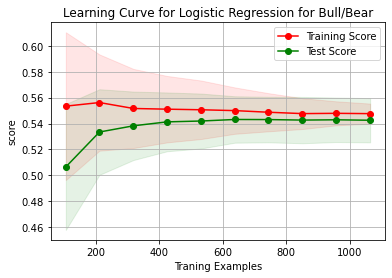

In [36]:
title = 'Learning Curve for Logistic Regression for Bull/Bear'
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)
model = LogisticRegression(solver='liblinear', random_state=0)
plot_learning_curve(model, title, ALL_X_Quarter, ALL_Y_Quarter, ylim=(0.7, 1.01), cv=cv)
plt.show()

### Lime

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(FSL_X_Quarter_Train[FSL_Features_L1].to_numpy(), 
                                                   feature_names=FSL_Features_L1,
                                                   mode = 'regression'
                                                  )

In [ ]:
i=5
exp = explainer.explain_instance(FSL_X_Quarter_Train[FSL_Features_L1].to_numpy()[i], model.predict, num_features=9)

In [ ]:
exp.show_in_notebook(show_table=True)

### SHAP

In [ ]:
model=LogisticRegression()
model.fit(FSL_X_Quarter_Train, FSL_Y_Quarter_Train)
y_pred_FSL_SHAP = model.predict(FSL_X_Quarter_Test)

In [ ]:
explainer = shap.KernelExplainer(model.predict, FSL_X_Quarter_Test)
shap_values = explainer.shap_values(FSL_X_Quarter_Test, nsamples=100)

In [ ]:
shap_values.shape

In [ ]:
shap.summary_plot(shap_values, FSL_X_Quarter_Test)

### Dependence plots

In [ ]:
shap.dependence_plot('Bear Beta Return', shap_values, FSL_X_Quarter_Test)

In [ ]:
shap.dependence_plot('Index Trend', shap_values, FSL_X_Quarter_Test)

In [ ]:
shap.dependence_plot('Bear NAV', shap_values, FSL_X_Quarter_Test)

### The colective force plot

In [ ]:
i=300
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[i], FSL_X_Quarter_Test.iloc[i])

In [ ]:
shap.force_plot(explainer.expected_value, shap_values, FSL_X_Quarter_Test)

In [ ]:
FSL_X_Quarter = transformer.fit_transform(FSL_X_Quarter)
FSL_X_Quarter=pd.DataFrame(FSL_X_Quarter,columns=["Index Trend", "Index Volatility","Bear Beta Price", "Bear Beta Return", 
                                "Bull Ave Volume","Bear Ave Volume", "Bear Ave MCap","Bull Ave Spread", "Bear Ave Spread", 
                                "Bear Ave Turnover","Bear NAV","Bear Ave PTNAV"])

In [ ]:
model = LogisticRegression().fit(FSL_X_Quarter,FSL_Y_Quarter)

In [ ]:
explainer = shap.Explainer(model, FSL_X_Quarter)
shap_values = explainer(FSL_X_Quarter)

In [ ]:
shap.plots.heatmap(shap_values,max_display=13)

In [ ]:
shap.plots.bar(shap_values, max_display=13)